In [40]:
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
import gensim
import csv
import json
import nltk
from gensim import corpora, models
import numpy as np
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle 
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input, Dense, Dropout, Embedding, Flatten, LSTM, Bidirectional
import itertools
from matplotlib import pyplot
from gensim.models.ldamulticore import LdaMulticore
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
import math
import seaborn as sns
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from scipy.sparse import csr_matrix
from keras.models import load_model

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D,Conv1D,LSTM
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
def remove_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

def text_preprocess(x):
    text = remove_html(x)
    text = text.lower()
    text = text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
    text = re.sub(r"\b[a-zA-Z]\b", ' ', text)
    text = word_tokenize(text)
    stops = set(stopwords.words("english"))
    text = [i for i in text if i not in stops]
    return text

In [5]:
text = [text_preprocess(x) for x in df['review']]

In [6]:
dictionary = gensim.corpora.Dictionary(text)
print('Total documents:', dictionary.num_docs)
print('Total words:', dictionary.num_pos)
print('Distinct words:', len(dictionary))

Total documents: 50000
Total words: 5966534
Distinct words: 104661


In [7]:
dictionary.filter_extremes(no_below=50)
print('Total documents:', dictionary.num_docs)
print('Total words:', dictionary.num_pos)
print('Distinct words:', len(dictionary))

Total documents: 50000
Total words: 5966534
Distinct words: 10052


In [8]:
X = [dictionary.doc2idx(doc, unknown_word_index=-1) for doc in text]
temp = []
for document in X:
    temp.append([i for i in document if i != -1])
X = temp   

In [9]:
y = list(df['sentiment'])
y = [1 if i == 'positive' else 0 for i in y]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [11]:
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [12]:
vocab_size = len(dictionary)
# one hot embedding
temp = np.zeros((1, vocab_size))
embedding_weights = np.zeros((vocab_size, vocab_size))
for i in range(len(embedding_weights)):
    embedding_weights[i][i] = 1
embedding_weights = np.concatenate((temp, embedding_weights), axis=0)    

In [13]:
# word x word
temp = np.zeros((1, vocab_size))
embedding_weights2 = np.zeros((vocab_size, vocab_size))
for i in range(len(embedding_weights)):
    if i%50 == 0:
        print(i)
    word_exist_lists = []
    for document in X:
        if i in document:
            word_exist_lists.append(document)
    word_exist_lists = [val for sublist in word_exist_lists for val in sublist]
    word_exist_lists = list(zip(Counter(word_exist_lists).keys(), Counter(word_exist_lists).values()))
    for word, count in word_exist_lists:
        embedding_weights2[i][word] += count
embedding_weights2 = np.concatenate((temp, embedding_weights2), axis=0)  

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
8050
8100
8150
8200
8250
8300
8350
8400
8450
8500
8550
8600
8650
8700
8750
8800
8850
8900
8950
9000
9050
9100
9150
9200
9250
9300
9350
9400
9450
9500
9550
9600
9650
9700
9750
9800
9850
9900
9950
10000
10050


In [14]:
# word2vec
vector_size = 100
word2vec = gensim.models.Word2Vec(sentences=text, size=vector_size, min_count=1)

temp = np.zeros((1, vector_size))
embedding_weights3 = np.zeros((vocab_size, vector_size))
for idx, word in dictionary.id2token.items(): #
    embedding_weights3[idx] = word2vec.wv[word]
embedding_weights3 = np.concatenate((temp, embedding_weights3), axis=0)  

In [15]:
word2vec.wv.most_similar('dog')

[('cat', 0.756543755531311),
 ('puppy', 0.72847580909729),
 ('monkey', 0.6910975575447083),
 ('bite', 0.6843846440315247),
 ('rat', 0.6837461590766907),
 ('freak', 0.6742722988128662),
 ('chicken', 0.6695947051048279),
 ('soup', 0.6683763265609741),
 ('pet', 0.6529672145843506),
 ('eat', 0.6423126459121704)]

In [16]:
embedding_weights

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [58]:
embedding_weights2

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.244e+03, 2.000e+00, 1.600e+01, ..., 7.000e+00, 8.000e+00,
        9.000e+00],
       [2.000e+00, 5.800e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [8.000e+00, 0.000e+00, 0.000e+00, ..., 7.200e+01, 0.000e+00,
        3.000e+00],
       [1.100e+01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 6.000e+01,
        0.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        7.100e+01]])

In [30]:
embedding_weights3

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.52427471,  0.35277975,  0.41274524, ...,  1.63099992,
         0.02881975, -0.54497701],
       [-0.37655869, -0.27064472, -0.10655311, ...,  0.09091809,
         0.13988782,  0.13104627],
       ...,
       [-0.11918246, -0.10081354, -0.07031845, ...,  0.04232553,
         0.08791208, -0.11213604],
       [-0.1793955 ,  0.0902925 ,  0.28385606, ...,  0.41307884,
         0.0713767 , -0.19674842],
       [-0.18589349, -0.3237569 ,  0.38261575, ..., -0.32274777,
         0.33173734, -0.28223792]])

In [49]:
model = Sequential()

model.add(Embedding(vocab_size+1, vocab_size, weights=[embedding_weights], input_length=maxlen , trainable=False))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 10052)        101052756 
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 10052)        0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                2581760   
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 103,634,581
Trainable params: 2,581,825
Non-trainable params: 101,052,756
_________________________________________________________________


In [51]:
hist = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=1)

Train on 32000 samples, validate on 8000 samples
Epoch 1/5
32000/32000 [==============================] - 1400s 44ms/step - loss: 0.5104 - acc: 0.7530 - val_loss: 0.3518 - val_acc: 0.8626
Epoch 2/5
32000/32000 [==============================] - 1691s 53ms/step - loss: 0.3638 - acc: 0.8467 - val_loss: 0.3511 - val_acc: 0.8735
Epoch 3/5
32000/32000 [==============================] - 1558s 49ms/step - loss: 0.3233 - acc: 0.8682 - val_loss: 0.2975 - val_acc: 0.8790
Epoch 4/5
32000/32000 [==============================] - 1571s 49ms/step - loss: 0.2940 - acc: 0.8785 - val_loss: 0.2898 - val_acc: 0.8821
Epoch 5/5
10000/10000 [==============================] - 244s 24ms/step


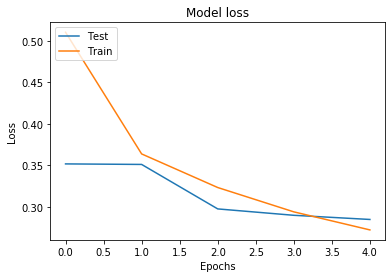

In [78]:
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Test', 'Train'], loc='upper left')
plt.show()

In [59]:
print('test loss, test acc:', score)

test loss, test acc: [0.27251629419326784, 0.89410001039505]


In [55]:
model2 = Sequential()

model2.add(Embedding(vocab_size+1, vocab_size, weights=[embedding_weights2], input_length=maxlen , trainable=False))
model2.add(Dropout(0.5))
model2.add(Bidirectional(LSTM(32)))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [56]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 10052)        101052756 
_________________________________________________________________
dropout_8 (Dropout)          (None, 100, 10052)        0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                2581760   
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 103,634,581
Trainable params: 2,581,825
Non-trainable params: 101,052,756
_________________________________________________________________


In [60]:
hist2 = model2.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)
score2 = model2.evaluate(X_test, y_test, verbose=1)

Train on 32000 samples, validate on 8000 samples
Epoch 1/5
32000/32000 [==============================] - 2159s 67ms/step - loss: 0.7143 - acc: 0.5025 - val_loss: 0.6908 - val_acc: 0.5253
Epoch 2/5
32000/32000 [==============================] - 1514s 47ms/step - loss: 0.6972 - acc: 0.5080 - val_loss: 0.6890 - val_acc: 0.5299
Epoch 3/5
32000/32000 [==============================] - 1017s 32ms/step - loss: 0.6925 - acc: 0.5142 - val_loss: 0.6884 - val_acc: 0.5309
Epoch 4/5
32000/32000 [==============================] - 958s 30ms/step - loss: 0.6902 - acc: 0.5167 - val_loss: 0.6871 - val_acc: 0.5304
Epoch 5/5
10000/10000 [==============================] - 129s 13ms/step


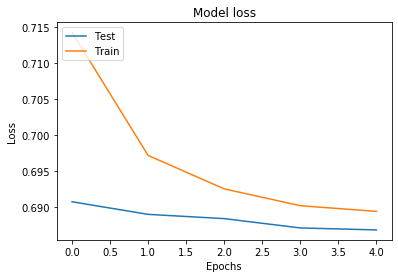

In [79]:
plt.plot(hist2.history['val_loss'])
plt.plot(hist2.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Test', 'Train'], loc='upper left')
plt.show()

In [62]:
print('test loss, test acc:', score2)

test loss, test acc: [0.6873982948303222, 0.5254999995231628]


In [73]:
model3 = Sequential()

model3.add(Embedding(vocab_size+1, vector_size, weights=[embedding_weights3], input_length=maxlen , trainable=False))
model3.add(Dropout(0.5))
model3.add(Bidirectional(LSTM(32)))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [74]:
model3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 100)          1005300   
_________________________________________________________________
dropout_14 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 64)                34048     
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 1,039,413
Trainable params: 34,113
Non-trainable params: 1,005,300
_________________________________________________________________


In [75]:
hist3 = model3.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)
score3 = model3.evaluate(X_test, y_test, verbose=1)

Train on 32000 samples, validate on 8000 samples
Epoch 1/5
32000/32000 [==============================] - 30s 946us/step - loss: 0.6790 - acc: 0.5638 - val_loss: 0.6192 - val_acc: 0.6755
Epoch 2/5
32000/32000 [==============================] - 29s 899us/step - loss: 0.6171 - acc: 0.6630 - val_loss: 0.5634 - val_acc: 0.7149
Epoch 3/5
32000/32000 [==============================] - 29s 921us/step - loss: 0.5834 - acc: 0.6943 - val_loss: 0.5159 - val_acc: 0.7529
Epoch 4/5
32000/32000 [==============================] - 29s 902us/step - loss: 0.5497 - acc: 0.7209 - val_loss: 0.5302 - val_acc: 0.7600
Epoch 5/5
10000/10000 [==============================] - 6s 584us/step


In [135]:
hist3.history

{'val_loss': [0.6192039141654968,
  0.5634308314323425,
  0.5159142265319824,
  0.5301860752105713,
  0.5000154626369476],
 'val_acc': [0.6754999756813049,
  0.7148749828338623,
  0.7528749704360962,
  0.7599999904632568,
  0.7749999761581421],
 'loss': [0.6790124049186707,
  0.6170849561691284,
  0.5834078265428543,
  0.5497499930858613,
  0.5319766889810562],
 'acc': [0.56378126, 0.6630312, 0.6943125, 0.720875, 0.73196876]}

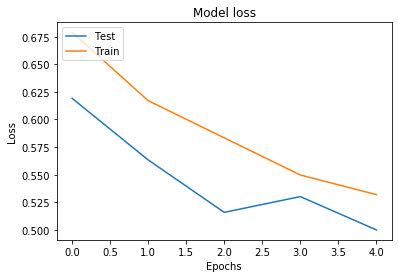

In [80]:
plt.plot(hist3.history['val_loss'])
plt.plot(hist3.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Test', 'Train'], loc='upper left')
plt.show()

In [77]:
print('test loss, test acc:', score3)

test loss, test acc: [0.4724204933643341, 0.7825000286102295]


In [ ]:
# try word2vec without removing words
dictionary2 = gensim.corpora.Dictionary(text)
X2 = [dictionary2.doc2idx(doc, unknown_word_index=-1) for doc in text]
temp = []
for document in X2:
    temp.append([i for i in document if i != -1])
X2 = temp   
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=99)
maxlen2 = 100
X_train2 = pad_sequences(X_train2, padding='post', maxlen=maxlen2)
X_test2 = pad_sequences(X_test2, padding='post', maxlen=maxlen2)
vocab_size2 = len(dictionary2)

vector_size2 = 1000
word2vec2 = gensim.models.Word2Vec(sentences=text, size=vector_size2, min_count=1)

temp = np.zeros((1, vector_size2))
embedding_weights4 = np.zeros((vocab_size2, vector_size2))
for word, idx in dictionary2.token2id.items():
    embedding_weights4[idx] = word2vec2.wv[word]
embedding_weights4 = np.concatenate((temp, embedding_weights4), axis=0)  

In [127]:
embedding_weights4

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.74706298e-01,  4.14134711e-01,  3.79388854e-02, ...,
        -3.17932636e-01, -4.04051542e-02, -2.77629614e-01],
       [-1.21162497e-01, -8.96108896e-02, -6.33463962e-03, ...,
        -9.88041237e-02, -1.65012386e-02, -5.72095327e-02],
       ...,
       [-4.42946423e-03,  1.29045418e-03, -1.05277810e-04, ...,
        -1.17877172e-03, -4.75391140e-03,  4.63917432e-03],
       [-2.54105218e-03,  5.05413394e-03,  1.83977667e-04, ...,
        -1.89024769e-03, -4.02791100e-03, -7.06292177e-03],
       [ 2.81693763e-03,  2.82562571e-03, -4.04510833e-03, ...,
        -1.36715057e-03, -1.21953785e-02, -8.83955508e-05]])

In [128]:
model4 = Sequential()

model4.add(Embedding(vocab_size2+1, vector_size2, weights=[embedding_weights4], input_length=maxlen2 , trainable=False))
model4.add(Dropout(0.5))
model4.add(Bidirectional(LSTM(32)))
model4.add(Dropout(0.5))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [129]:
model4.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 1000)         104662000 
_________________________________________________________________
dropout_18 (Dropout)         (None, 100, 1000)         0         
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 64)                264448    
_________________________________________________________________
dropout_19 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 104,926,513
Trainable params: 264,513
Non-trainable params: 104,662,000
_________________________________________________________________


In [130]:
hist4 = model4.fit(X_train2, y_train2, batch_size=128, epochs=5, verbose=1, validation_split=0.2)
score4 = model4.evaluate(X_test2, y_test2, verbose=1)

Train on 32000 samples, validate on 8000 samples
Epoch 1/5
32000/32000 [==============================] - 195s 6ms/step - loss: 0.6066 - acc: 0.6631 - val_loss: 0.5134 - val_acc: 0.7504
Epoch 2/5
32000/32000 [==============================] - 185s 6ms/step - loss: 0.5109 - acc: 0.7485 - val_loss: 0.4564 - val_acc: 0.7880
Epoch 3/5
32000/32000 [==============================] - 181s 6ms/step - loss: 0.4604 - acc: 0.7829 - val_loss: 0.4742 - val_acc: 0.7729
Epoch 4/5
32000/32000 [==============================] - 194s 6ms/step - loss: 0.4263 - acc: 0.8068 - val_loss: 0.4042 - val_acc: 0.8136
Epoch 5/5
10000/10000 [==============================] - 32s 3ms/step


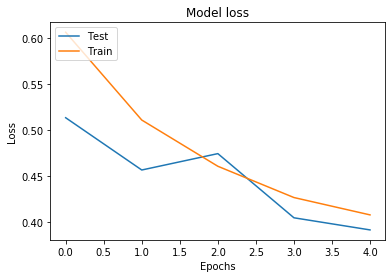

In [131]:
plt.plot(hist4.history['val_loss'])
plt.plot(hist4.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Test', 'Train'], loc='upper left')
plt.show()

In [132]:
print('test loss, test acc:', score4)

test loss, test acc: [0.3722684697151184, 0.8374000191688538]
